<a href="https://colab.research.google.com/github/Dipto1971/Statistical-Analysis-Data-Science/blob/main/Assignment/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Github: https://github.com/Dipto1971/Statistical-Analysis-Data-Science/tree/main/Assignment

In [27]:
!gdown --id 1XnxWbFgcwFmbNY4mQAiTaMqL-aB8YGbl
url = 'education_data.csv'
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XnxWbFgcwFmbNY4mQAiTaMqL-aB8YGbl
To: /content/education_data.csv
100% 883k/883k [00:00<00:00, 73.4MB/s]


,Student_ID,Age,Gender,Department,Year_of_Study,CGPA,Attendance_Percentage,Study_Hours_per_Week,Extracurricular_Activities,Part_Time_Job,Satisfaction_Level,Scholarship,Parental_Education_Level,Internet_Access,Family_Income
0,S0001,24,Non-binary,Biology,Second,3.78,86.13,28,Yes,Yes,Neutral,Yes,PhD,Yes,Low
1,S0002,21,Non-binary,Physics,Third,2.69,57.24,11,No,No,Very Satisfied,No,PhD,No,Medium
2,S0003,28,Male,Economics,Third,2.85,71.93,19,Yes,Yes,Very Dissatisfied,No,Bachelor's,No,Medium
3,S0004,25,Male,Chemistry,Fourth,2.91,77.15,29,Yes,No,Very Satisfied,No,Bachelor's,No,Medium
4,S0005,22,Female,Biology,Fourth,2.35,85.11,21,Yes,No,Dissatisfied,Yes,High School,No,High


In [28]:
# Check for Missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
print("Missing Data: ", missing_percentage)

# Theree's missing data in CGPA and Attendance_Percentage

Missing Data:  Student_ID                     0.00
Age                            0.00
Gender                         0.00
Department                     0.00
Year_of_Study                  0.00
CGPA                          10.01
Attendance_Percentage         10.24
Study_Hours_per_Week           0.00
Extracurricular_Activities     0.00
Part_Time_Job                  0.00
Satisfaction_Level             0.00
Scholarship                    0.00
Parental_Education_Level       0.00
Internet_Access                0.00
Family_Income                  0.00
dtype: float64


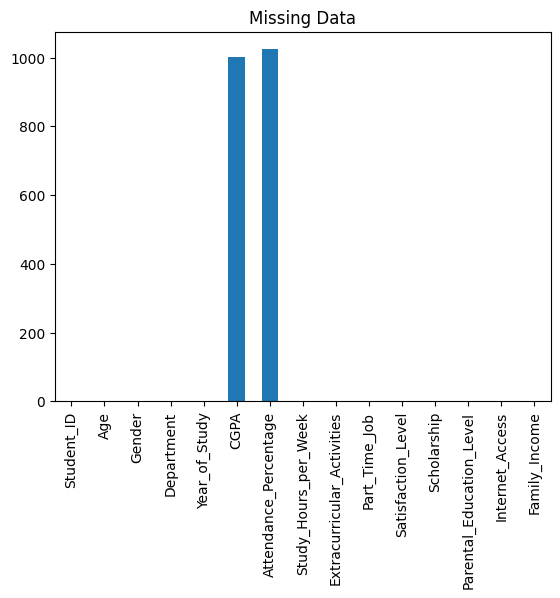

Mean of CGPA:  3.000502278030892
Mean of Attendance Percentage:  75.1243404634581


In [29]:
# Visualize Missing data using historgram
missing_data.plot(kind='bar', title='Missing Data')
plt.show()

# Missing data in columns CGPA and Attendance Percentage. Determining the CGPA_mean and Attendance_Percentage_mean
CGPA_mean = df['CGPA'].mean()
Attendance_Percentage_mean = df['Attendance_Percentage'].mean()
print("Mean of CGPA: ", CGPA_mean)
print("Mean of Attendance Percentage: ", Attendance_Percentage_mean)

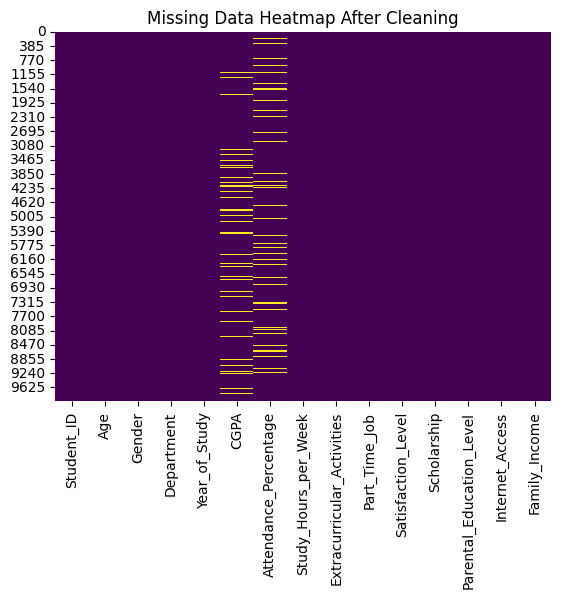

In [30]:
# Visualize missing data after cleaning
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap After Cleaning')
plt.show()

In [31]:
# Handling missing data: For only CGPA and Attendance_Percentage columns
df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)
df['Attendance_Percentage'].fillna(df['Attendance_Percentage'].mean(), inplace=True)


<ipython-input-31-8e0dc258b3e5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)
<ipython-input-31-8e0dc258b3e5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [32]:
# Check for missing data after cleaning
missing_data_after = df.isnull().sum()
missing_percentage_after = (missing_data_after / len(df)) * 100
print("Missing Data After Cleaning:\n", missing_percentage_after)

# Show CGPA counts according to range
df['CGPA'].value_counts(bins=5).sort_index()

# There's CGPA values above 4
# CGPA's above 4
df[df['CGPA'] > 4]

Missing Data After Cleaning:
 Student_ID                    0.0
Age                           0.0
Gender                        0.0
Department                    0.0
Year_of_Study                 0.0
CGPA                          0.0
Attendance_Percentage         0.0
Study_Hours_per_Week          0.0
Extracurricular_Activities    0.0
Part_Time_Job                 0.0
Satisfaction_Level            0.0
Scholarship                   0.0
Parental_Education_Level      0.0
Internet_Access               0.0
Family_Income                 0.0
dtype: float64


,Student_ID,Age,Gender,Department,Year_of_Study,CGPA,Attendance_Percentage,Study_Hours_per_Week,Extracurricular_Activities,Part_Time_Job,Satisfaction_Level,Scholarship,Parental_Education_Level,Internet_Access,Family_Income
9,S0010,28,Non-binary,Chemistry,Third,4.15,99.36,16,Yes,No,Dissatisfied,No,Master's,Yes,Low
72,S0073,19,Male,Biology,Second,4.03,51.17,28,No,No,Neutral,Yes,Master's,Yes,Medium
257,S0258,21,Male,Biology,First,4.08,77.92,10,Yes,No,Very Dissatisfied,Yes,PhD,Yes,High
352,S0353,22,Male,Economics,Fourth,4.16,99.78,35,Yes,No,Satisfied,Yes,Master's,No,High
356,S0357,22,Male,Economics,Fourth,4.07,50.59,10,No,No,Neutral,No,High School,Yes,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9517,S9518,21,Male,Computer Science,First,4.04,76.47,8,Yes,No,Neutral,No,PhD,No,Low
9588,S9589,27,Male,Economics,Second,4.11,72.36,39,No,Yes,Satisfied,Yes,PhD,Yes,Low
9699,S9700,19,Male,Mathematics,Third,4.15,65.57,25,No,Yes,Neutral,Yes,Master's,Yes,High
9908,S9909,25,Male,Chemistry,First,4.02,69.64,37,No,No,Very Satisfied,Yes,Master's,Yes,Medium


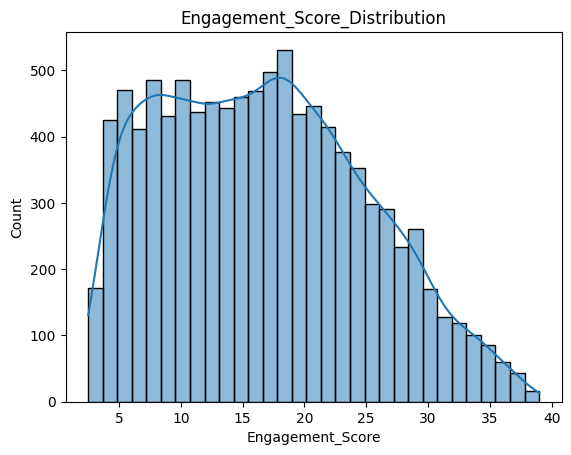

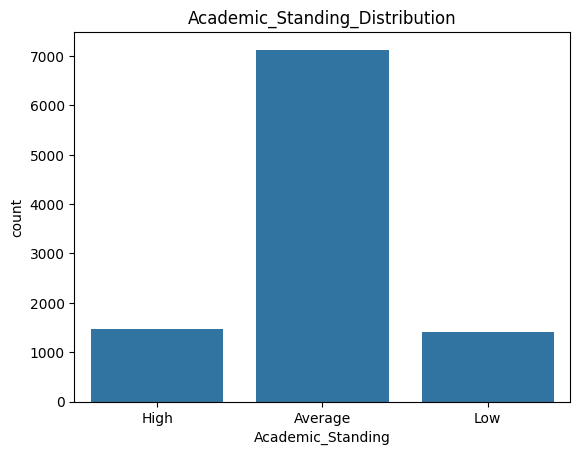

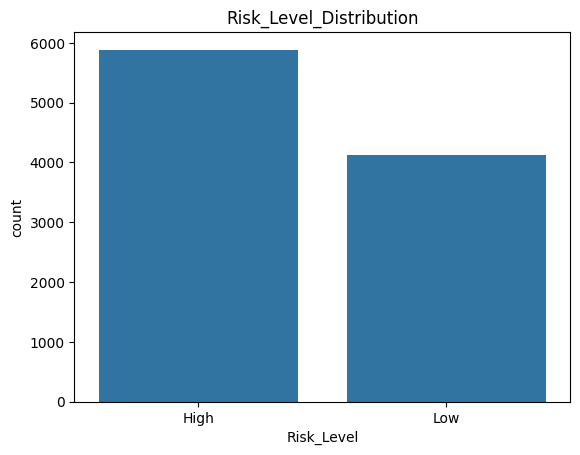

In [33]:
# Create Engagement Score
df['Engagement_Score'] = df['Study_Hours_per_Week'] * df['Attendance_Percentage'] / 100

# Create Academic Standing
def academic_standing(cgpa):
    if cgpa < 2.5:
        return 'Low'
    elif 2.5 <= cgpa < 3.5:
        return 'Average'
    else:
        return 'High'

df['Academic_Standing'] = df['CGPA'].apply(academic_standing)

# Create Risk Level based on conditions
def risk_level(row):
    if row['Attendance_Percentage'] < 60 or row['Part_Time_Job'] == 'Yes' or row['Satisfaction_Level'] == 'Low':
        return 'High'
    return 'Low'

df['Risk_Level'] = df.apply(risk_level, axis=1)

# Visualize the new features
# Engagement Score
sns.histplot(df['Engagement_Score'], kde=True)
plt.title('Engagement_Score_Distribution')
plt.show()

# Academic Standing
sns.countplot(data=df, x='Academic_Standing')
plt.title('Academic_Standing_Distribution')
plt.show()

# Risk Level
sns.countplot(data=df, x='Risk_Level')
plt.title('Risk_Level_Distribution')
plt.show()


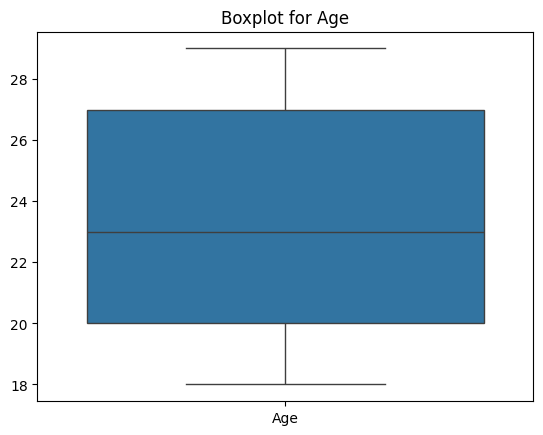

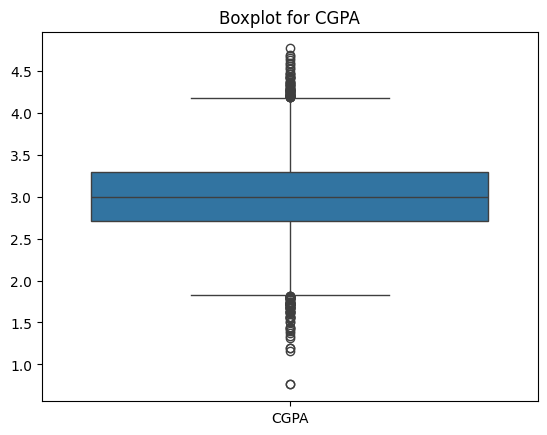

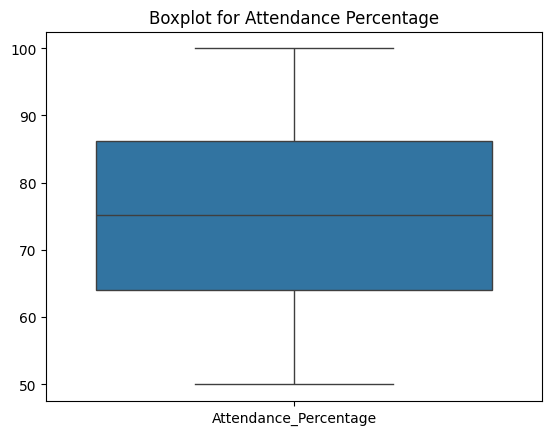

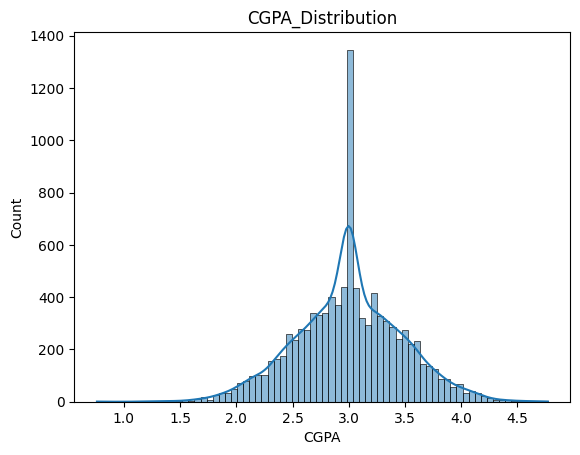

In [34]:
# Boxplots for detecting outliers
sns.boxplot(data=df[['Age']])
plt.title('Boxplot for Age')
plt.show()

sns.boxplot(data=df[['CGPA']])
plt.title('Boxplot for CGPA')
plt.show()

sns.boxplot(data=df[['Attendance_Percentage']])
plt.title('Boxplot for Attendance Percentage')
plt.show()

# Analyzing the boxplot: Outliers detected only in CGPA

# Histogram for CGPA
sns.histplot(df['CGPA'], kde=True)
plt.title('CGPA_Distribution')
plt.show()

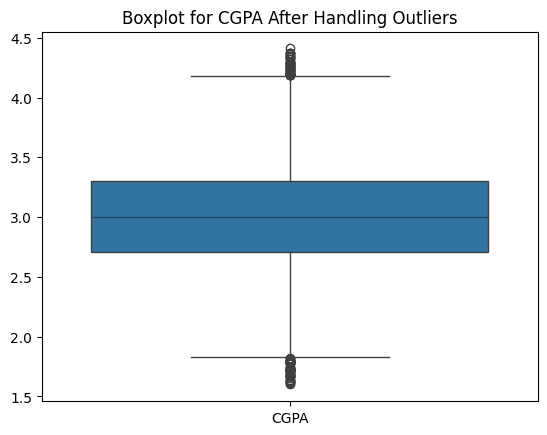

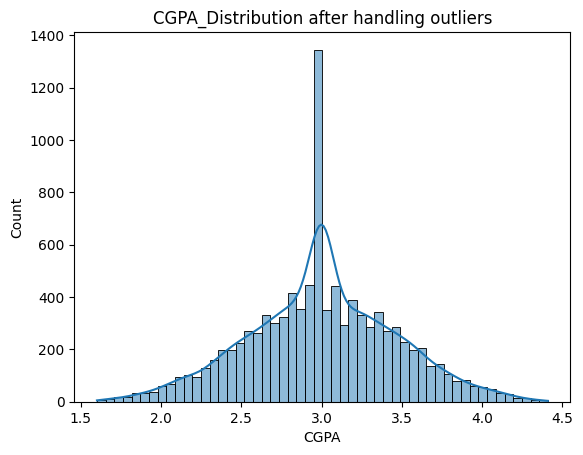

In [35]:
# Handling CGPA outliers based on Z-Scores
from scipy import stats
import numpy as np

# Firstly, Remove CGPAs above 4
# df = df[df['CGPA'] <= 4]

# Calculate Z-Scores and remove z-score value >3
z_scores = np.abs(stats.zscore(df['CGPA']))
df = df[(z_scores < 3)]

sns.boxplot(data=df[['CGPA']])
plt.title('Boxplot for CGPA After Handling Outliers')
plt.show()

# Histogram for CGPA after Handling Outliers
sns.histplot(df['CGPA'], kde=True)
plt.title('CGPA_Distribution after handling outliers')
plt.show()

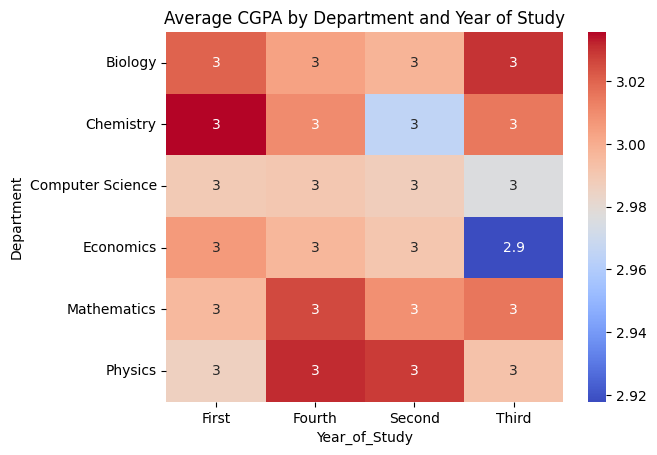

In [36]:
# Pivot table to summarize average CGPA by Department and Year of Study
pivot_table = df.pivot_table(values='CGPA', index='Department', columns='Year_of_Study', aggfunc='mean')

# Visualize the pivot table as a heatmap
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Average CGPA by Department and Year of Study')
plt.show()

# Chemistry(2nd) & Economics(3rd) indicates dip in performance


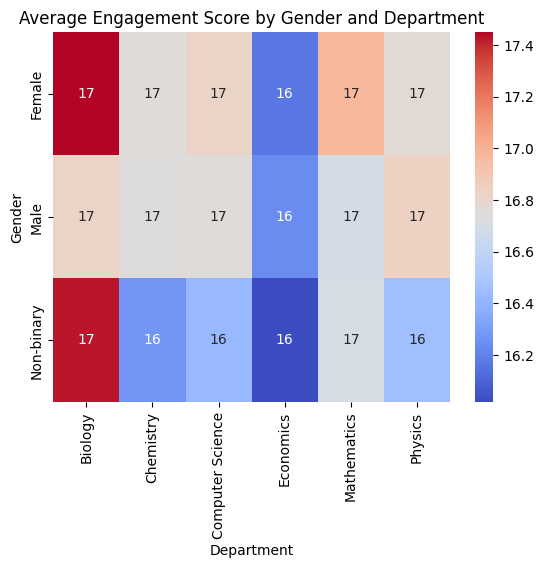

In [37]:
# Groupby analysis of Engagement Score by Gender and Department
engagement_by_gender_dept = df.groupby(['Gender', 'Department'])['Engagement_Score'].mean().unstack()

# Visualize the Engagement Score using a heatmap
sns.heatmap(engagement_by_gender_dept, annot=True, cmap='coolwarm')
plt.title('Average Engagement Score by Gender and Department')
plt.show()


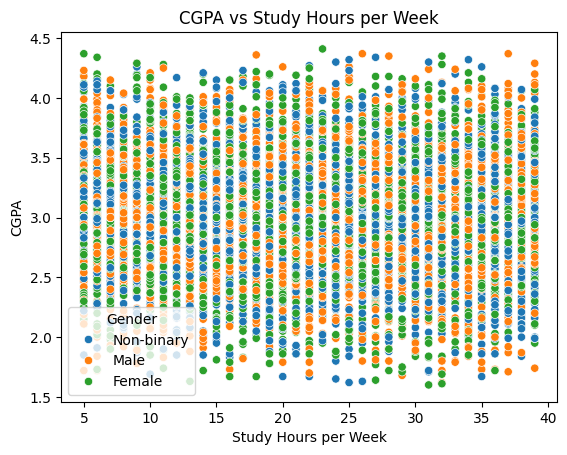

In [38]:
# Scatter plot between CGPA and Study Hours per Week
sns.scatterplot(data=df, x='Study_Hours_per_Week', y='CGPA', hue='Gender')
plt.title('CGPA vs Study Hours per Week')
plt.xlabel('Study Hours per Week')
plt.ylabel('CGPA')
plt.show()

In [39]:
df.to_csv('cleaned_data.csv', index=False)